In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics as m
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RepeatedKFold
import pandas as pd
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

def evaluate(clf,x,y, k):
    title="Confusion matrix"
    class_names = ["trustworthy","untrustworthy",]
    y_pred = cross_val_predict(clf, x, y, cv=5)
    cnf = confusion_matrix(y, y_pred)
    plot_confusion_matrix(cnf, classes=class_names, title=title)
    cvs=cross_val_score(clf,x, y, scoring='accuracy', cv=k)
    score=sum(cvs)/len(cvs)
    print('Avg. 5 fold cross validation accuracy: '+str(score))
    cvs=cross_val_score(clf,x, y, scoring='average_precision', cv=k)
    score=sum(cvs)/len(cvs)
    print('Avg. 5 fold cross validation precision: '+str(score))
    cvs=cross_val_score(clf,x, y, scoring='recall', cv=k)
    score=sum(cvs)/len(cvs)
    print('Avg. 5 fold cross validation recall: '+str(score))
    cvs=cross_val_score(clf,x, y, scoring='f1', cv=k)
    score=sum(cvs)/len(cvs)
    print('Avg. 5 fold cross validation F1: '+str(score))

def plot_confusion_matrix(cm,classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
def get_pd_overview(cv_results):
    pd_results = pd.DataFrame(grid_search.cv_results_)
    params = pd_results.loc[:,"params"]
    mean_test_scores = pd_results.loc[:,"mean_test_score"]
    frames = [mean_test_scores, params]
    overview = pd.concat(frames,  axis=1)
    return overview

-----------

## Dishonest Internet users Dataset Data Set

### The dataset was used to test an architecture based on a trust model capable to cope with the evaluation of the trustworthiness of users interacting in pervasive environments.

Dataset Characeteristics: Multivariate <br>
Attribute Characteristics: Integer, Real <br>
Number of Instances: 322 <br>
Number of Attributes: 5 <br>
Missing Values: No 
	

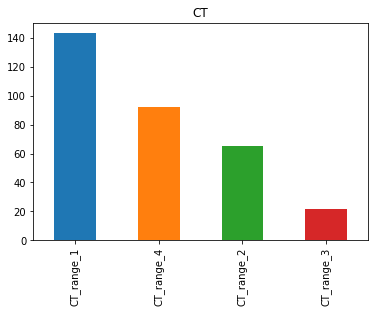

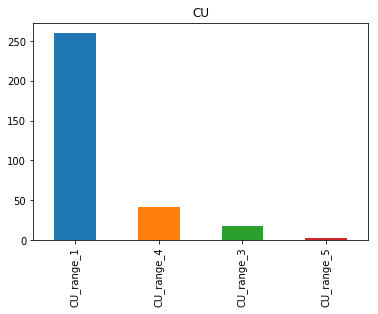

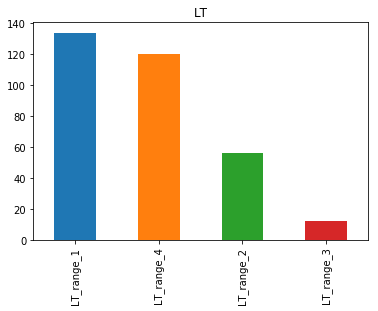

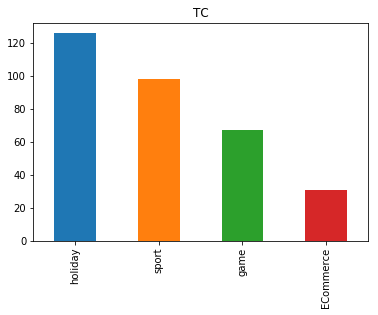

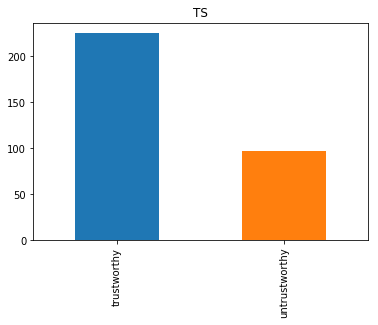

In [102]:
header = ['CT','CU', 'LT', 'TC', 'TS']
internet_raw = pd.read_csv('./internet/internet.txt', sep=' ',names=header)
enc = OrdinalEncoder(categories='auto', dtype=int)
enc.fit(internet_raw)
internet=enc.transform(internet_raw)
internet_input = internet[:,0:4]
internet_target = internet[:,4]

for item in header:
    internet_raw[item].value_counts().plot(title = item, kind='bar')
    plt.show()



### Decision Tree

In [103]:
## DECISION TREE
param_grid = [
  {'max_depth': [1, 5, 10, 50], 'criterion': ["gini"]},
  {'max_depth': [1, 5, 10, 50], 'criterion': ["entropy"]},
 ]

clf = tree.DecisionTreeClassifier()

grid_search = GridSearchCV(clf, param_grid, cv = 5, iid=False, return_train_score=True)

grid_search.fit(internet_input,internet_target) 
cv_results = grid_search.cv_results_
overview = get_pd_overview(cv_results)
print(overview)
print("\nBest parameters: ", grid_search.best_params_)

   mean_test_score                                     params
0         0.609567      {'criterion': 'gini', 'max_depth': 1}
1         0.993846      {'criterion': 'gini', 'max_depth': 5}
2         0.993846     {'criterion': 'gini', 'max_depth': 10}
3         0.993846     {'criterion': 'gini', 'max_depth': 50}
4         0.609567   {'criterion': 'entropy', 'max_depth': 1}
5         0.993846   {'criterion': 'entropy', 'max_depth': 5}
6         1.000000  {'criterion': 'entropy', 'max_depth': 10}
7         0.993846  {'criterion': 'entropy', 'max_depth': 50}

Best parameters:  {'criterion': 'entropy', 'max_depth': 10}


Avg. 5 fold cross validation accuracy: 1.0
Avg. 5 fold cross validation precision: 0.9818181818181818
Avg. 5 fold cross validation recall: 1.0
Avg. 5 fold cross validation F1: 0.9904761904761905


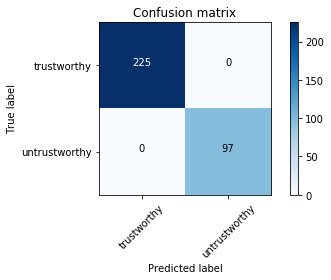

In [104]:
# use best parameters for model
clf = grid_search.best_estimator_
evaluate(clf,internet_input, internet_target, 5)

### Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier

## RANDOM FOREST
param_grid = [
  {'n_estimators':[20,100,200],'max_depth': [1, 5, 10, 50], 'criterion': ["gini"]},
  {'n_estimators':[20,100,200],'max_depth': [1, 5, 10, 50], 'criterion': ["entropy"]},
 ]
clf = RandomForestClassifier(n_estimators = 100)

grid_search = GridSearchCV(clf, param_grid, cv = 5, iid=False, return_train_score=True)

grid_search.fit(internet_input,internet_target) 
cv_results = grid_search.cv_results_
overview = get_pd_overview(cv_results)
print(overview)
print("\nBest parameters: ", grid_search.best_params_)

    mean_test_score                                             params
0          0.760769  {'criterion': 'gini', 'max_depth': 1, 'n_estim...
1          0.760769  {'criterion': 'gini', 'max_depth': 1, 'n_estim...
2          0.760769  {'criterion': 'gini', 'max_depth': 1, 'n_estim...
3          1.000000  {'criterion': 'gini', 'max_depth': 5, 'n_estim...
4          1.000000  {'criterion': 'gini', 'max_depth': 5, 'n_estim...
5          1.000000  {'criterion': 'gini', 'max_depth': 5, 'n_estim...
6          1.000000  {'criterion': 'gini', 'max_depth': 10, 'n_esti...
7          1.000000  {'criterion': 'gini', 'max_depth': 10, 'n_esti...
8          1.000000  {'criterion': 'gini', 'max_depth': 10, 'n_esti...
9          1.000000  {'criterion': 'gini', 'max_depth': 50, 'n_esti...
10         1.000000  {'criterion': 'gini', 'max_depth': 50, 'n_esti...
11         1.000000  {'criterion': 'gini', 'max_depth': 50, 'n_esti...
12         0.733077  {'criterion': 'entropy', 'max_depth': 1, 'n_es...
13    

Avg. 5 fold cross validation accuracy: 1.0
Avg. 5 fold cross validation precision: 1.0
Avg. 5 fold cross validation recall: 1.0
Avg. 5 fold cross validation F1: 1.0


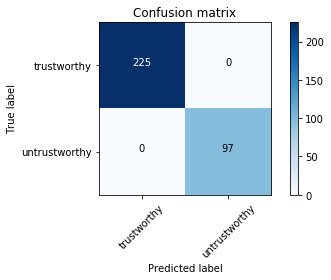

In [106]:
# use best parameters for model
clf = grid_search.best_estimator_
evaluate(clf,internet_input, internet_target, 5)

### Naive Bayes

In [114]:
from sklearn.naive_bayes import GaussianNB

## GAUSSIAN NAIVE BAYES
param_grid = {'var_smoothing':[1e-15,1e-12,1e-9,1e-7,1e-3, 1, 1e2,1e3,1e4,1e5,1e9],}
clf = GaussianNB()

grid_search = GridSearchCV(clf, param_grid, cv = 5, iid=False, return_train_score=True)

grid_search.fit(internet_input,internet_target) 
cv_results = grid_search.cv_results_
overview = get_pd_overview(cv_results)
print(overview)
print("\nBest parameters: ", grid_search.best_params_)

    mean_test_score                           params
0          0.558846         {'var_smoothing': 1e-15}
1          0.558846         {'var_smoothing': 1e-12}
2          0.558846         {'var_smoothing': 1e-09}
3          0.558846         {'var_smoothing': 1e-07}
4          0.558846         {'var_smoothing': 0.001}
5          0.677260             {'var_smoothing': 1}
6          0.698798         {'var_smoothing': 100.0}
7          0.698798        {'var_smoothing': 1000.0}
8          0.698798       {'var_smoothing': 10000.0}
9          0.698798      {'var_smoothing': 100000.0}
10         0.698798  {'var_smoothing': 1000000000.0}

Best parameters:  {'var_smoothing': 100.0}


Avg. 5 fold cross validation accuracy: 0.6987980769230769
Avg. 5 fold cross validation precision: 0.6570484015315639
Avg. 5 fold cross validation recall: 0.0
Avg. 5 fold cross validation F1: 0.0


/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being se

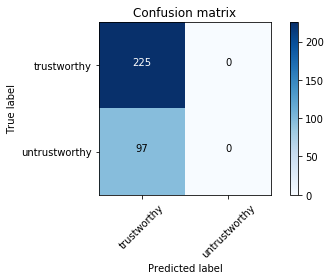

In [115]:
# use best parameters for model
clf = grid_search.best_estimator_
evaluate(clf,internet_input, internet_target, 5)

### Support vector machine

In [109]:


## SUPPORT VECTOR MACHINE
param_grid = {'kernel':['rbf'], 'C':[1, 10, 100, 1000]}

clf = SVC(gamma='scale')
grid_search = GridSearchCV(clf, param_grid, cv = 5, iid=False, return_train_score=True)

grid_search.fit(internet_input,internet_target) 
cv_results = grid_search.cv_results_
overview = get_pd_overview(cv_results)
print(overview)
print("\nBest parameters: ", grid_search.best_params_)

   mean_test_score                        params
0         0.938462     {'C': 1, 'kernel': 'rbf'}
1         1.000000    {'C': 10, 'kernel': 'rbf'}
2         1.000000   {'C': 100, 'kernel': 'rbf'}
3         1.000000  {'C': 1000, 'kernel': 'rbf'}

Best parameters:  {'C': 10, 'kernel': 'rbf'}


Avg. 5 fold cross validation accuracy: 1.0
Avg. 5 fold cross validation precision: 1.0
Avg. 5 fold cross validation recall: 1.0
Avg. 5 fold cross validation F1: 1.0


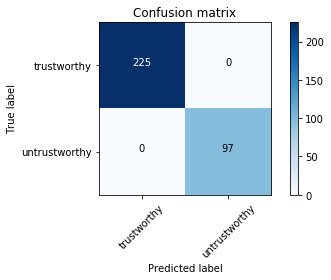

In [110]:
# use best parameters for model
clf = grid_search.best_estimator_
evaluate(clf,internet_input, internet_target, 5)